# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





In [1]:
import numpy as np
import matplotlib.pyplot as plt

-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$

$\mathbb{E}(X_t) = a +b\mathbb{E}(Z_t) +\mathbb{E}(Z_{t-1})= a  $

$\gamma(k)=Cov(X_{k+t},X_t)=bCov(Z_t,Z_{t+k-1})+bCov(Z_{t-1},Z_{t+k})+(b^2+1)Cov(Z_t,Z_{t+k})= \sigma^2 (b\mathbb{1}_{\lbrace -1,1 \rbrace}(k) + (b^2+1)\mathbb{1}_{\lbrace 0 \rbrace}(k))$

- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")

$\mathbb{E}(X_t) = a $ 

$\gamma(k)=Cov(X_{k+t},X_t)=\sum_{i=0}^K \sum_{j=0}^K Cov(2^{-i}Z_{t-i},2^{-j}Z_{t+k-j})~$ or $~Cov(2^{-i}Z_{t-i},2^{-j}Z_{t+k-j}) = 0~$ si $~k-j \neq -i~$ donc

$\gamma(k)=\sum_{i=0}^{K-k} \sigma^2 2^{-k-2i}= \sigma^2 2^{-k} \frac {4 - 4^{k-K}}{3}\mathbb{1}_{k \leq K} $ 

- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$

$\mathbb{E}(X_t)=\mathbb{E}(Z_t)+\mathbb{E}(A_0\cos(\lambda_0t+\Phi_0))=0$

$\gamma(k)=Cov(X_{k+t},X_t) = \frac {A_0^2} 2 cos(\lambda k) $ par ind�pendance de $\Phi_0$ et $Z_t$ et en remarquant que $cos(a)cos(b)= \frac 1 2 (cos(a+b) + cos(a-b))$

In [2]:
def empirical_mean(X):
    '''Compute the empirical mean based on the previous formula'''
    m=0
    for x in X:
        m+=x
    return m/len(X)

def empirical_autocovariance(X,k):
    '''Compute the empirical autocovariance based on the previous formula'''
    m=empirical_mean(X)
    gamma=0
    n=0
    for i in range(min(0,k),len(X)):
        if k+i<len(X) and i<len(X):
            n+=1
            gamma+=(X[k+i]-m)*(X[i]-m)
    try :
        return gamma/n
    except:
        return 0

def MSE(gamma_theoric,X):
    '''Compute the mean squarred error between a theorical gamma and his estimation'''
    return np.sum((gamma_theoric[k]-empirical_autocovariance(X,k))**2 for k in range(0,T))/T

def ComputeX_t(t,K):
    '''Compute X ,from the second given process, at the time t for a certain K for '''
    X_t=a
    for k in range(0,K+1):
        if k<len(X) :
            X_t+=2**(-k)*Z[t-k]  #we consider t-k<0 also
    return X_t

def autocov2(k):
    '''Theoretical autocovariance from the second given process'''
    if k>K:
        return 0
    return sigma**2*2**(-k)/3*(4-4**(k-K))


In [3]:
T_set=[10,100,500,1000]
sigma=1
a=3
b=2
A_0=10
result10=[]
result100=[]
result500=[]
result1000=[]
result={'10': np.zeros(100) , '100' : np.zeros(100) , '500' : np.zeros(100) , '1000' : np.zeros(100) }
lambda_0=np.random.uniform(0,np.pi,1)[0]
#Here you can uncomment the model you want to see.
model='First'
#model='SumK'
#model='Harmonic'
for T in T_set:
    K=T//3
    gamma1_th=np.zeros(T)
    gamma1_th[-1],gamma1_th[0],gamma1_th[1]=b*sigma**2,(b**2+1)*sigma**2,b*sigma**2
    gamma2_th=[autocov2(k) for k in range(T)]
    gamma3_th=[A_0**2*np.cos(lambda_0*k)/2 for k in range(T)]
    gamma3_th[0]+=1
    gamma_th={'First' : gamma1_th, 'SumK' :gamma2_th , 'Harmonic' : gamma3_th}
    for i in range(100):
        Z=np.random.normal(0,sigma,size=T)
        if model=='First':
            X=np.array([a+b*Z[t]+Z[t-1] for t in range(0,T)])
        elif model=='SumK':
            X=np.array([ComputeX_t(t,K) for t in range(0,T)])
        elif model=='Harmonic':
            phi=np.random.uniform(0,2*np.pi,1)[0]
            X=np.array([A_0*np.cos(lambda_0*t+phi)+Z[t] for t in range(0,T)])
        else: 
            raise Exception('Select model')
        result[str(T)][i]= MSE(gamma_th[model],X)



C:\Users\fanto\AppData\Local\Temp\ipykernel_23084\1260748399.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum((gamma_theoric[k]-empirical_autocovariance(X,k))**2 for k in range(0,T))/T


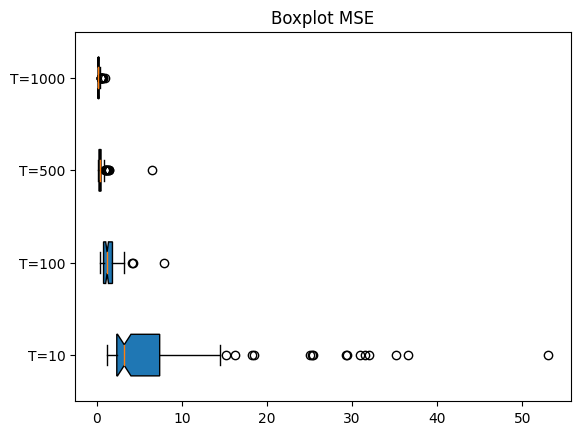

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
data=[result[str(T)] for T in T_set]
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
ax.set_yticklabels(['T=10', 'T=100',
                    'T=500', 'T=1000'])
 
# Adding title
plt.title("Boxplot MSE")
 
     
# show plot
plt.show()
 

# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$
2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.




In [5]:
import numpy as np
import matplotlib.pyplot as plt


1. $I_n(\frac {2 \pi k }{m}) = \frac 1 {2 \pi n}|\sum_{k=0}^{n-1}X_k e^{\frac{2 \pi k }{m}}|^2= \frac 1 {2 \pi n}|\overline{\sum_{k=0}^{n-1}X_k e^{\frac{2 \pi k }{m}}}|^2=\frac 1 {2 \pi n}|DFT(X,m)(k)|^2$ (we use that X is real valued)
2. Look below
3. We apply the short term Fourier Transform $\hat{\gamma}_n$  and we get the given equation, using the fact that  $\hat{\gamma}_n$ is the inverse transform of $I_n$
4. Si $m\geq n$, $I_n(\frac {2 \pi k }{m}) =  \frac{1}{2\pi} \sum_{l=0}^{n-1} \hat{\gamma}_n(l)e^{\frac {2 i \pi kl }{m}}= \frac 1 {2\pi} DFT(\hat{\gamma}_n,m)(k)$

Alors $\hat{\gamma}_n(k) = \frac{1}{n} IDFT(DFT(\hat{\gamma}_n,\tilde m))(k)= IDFT(2\pi I_n(\frac {2 \pi . }{m}),\tilde{m}) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)$ using question 1 equation.

In [6]:
#2
#Script of a DFT
def DFT(X,m,k):
    if m>=len(X):
        return sum([X[h]*np.exp(-2*1j*np.pi*k*h/m for h in range(len(X)))])
    else:
        return 0
        
#We use implemented python function for more efficiency
def compute_I(X,m,k):
    '''Compute I_n(2*pi*k/m)'''
    #return 1/(2*np.pi*len(X))*np.abs(DFT(X,m,k))**2
    return 1/(2*np.pi*len(X))*np.abs(np.fft.fft(X,n=m)[k])**2

def gamma_n(X,m):
     '''Compute the estimated autocovariance of X '''
     return [1/len(X)*np.fft.ifft([x**2 for x in np.abs(np.fft.fft(X,n=m))],n=m)[k] for k in range(len(X))]

    

c:\Users\fanto\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


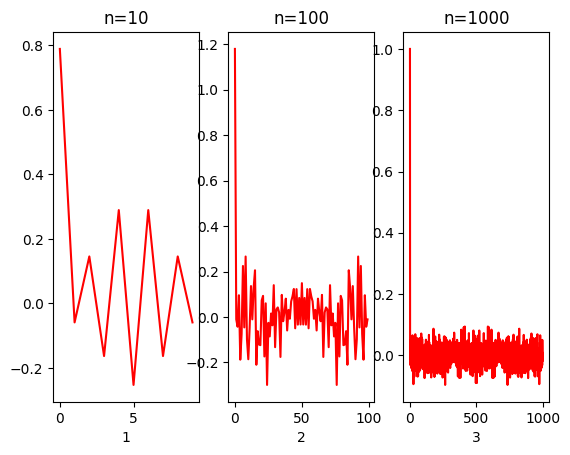

In [7]:
n_set=[10,100,1000]
gamma={'10': np.zeros(1) , '100' : np.zeros(1) , '500' : np.zeros(1) , '1000' : np.zeros(1) }    #Contain different autocovariance function for different values of n.
for n in n_set:
    Z=np.random.normal(0,1,size=n)   #White noise
    gamma[str(n)]=gamma_n(Z,len(Z))

fig = plt.figure()
i=1
for n in n_set:
    plt.subplot(130+i)
    plt.plot(gamma[str(n)], 'r-')
    plt.title("n="+str(n))
    plt.xlabel(str(i))
    i+=1
 
plt.show()

On semble bien pouvoir controler l'erreur dans le calcul de la covariance en fonction de n

# TSIA202a - Third Practice Session

The goal of this third partical work is to use an AR(p) process to model a speech signal, and show that this approach is surprisingly powerful despite its simplicity.

The proposed synthesis algorithm divides into several steps.
1. Filter the audio signal to emphasize the highest frequencies (in order to flatten the spectrum and reduce precision issues with FFT computations).
2. Split the signal into several overlapping frames and iterate over them.
    1. Detect if the frame corresponds to noise or to a voiced signal, and estimate the fundamental frequency in the later case.
    2. Estimate the AR(p) coefficients using Yule-Walker equations.
    3. Re-synthetise the frame using the AR(p) coefficients, starting from a white noise in the case of a noisy frame, or a Dirac comb in the case of a voiced frame.
3. Overlap-add the synthesized frames with a Hanning window.
4. Filter the synthesised signal to de-emphasize the highest frequencies.

We propose to implement this algorithm in two parts. First, we will derive the Yule-Walker equations, and test them on synthetic data. Then, we will code the synthesis algorithm and apply it on a real world speech signal.


# 1. Yule-Walker equations

Let us consider a causal, zero-mean, AR(p) process defined by the following recurrent equation: 
$$
X_t = Z_t + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p}
$$
where $\{Z_t , t \in \mathbb{Z}\}$ is a weak white noise with variance $\sigma^2$.

1. Show that, $\forall h \geq 1, \mathbb{E}[X_{t-h}Z_t]=0$.
2. Deduce a recurrent relation between $\gamma(h)$ and $\gamma(h-1),\gamma(h-2),\ldots,\gamma(h-p)$, for $h \geq 1$.
3. We consider separately the case $h=0$: find a new relationship between $\gamma(0)$ and $\gamma(-1),\gamma(-2),\ldots,\gamma(-p)$.
4. Put these relationships in matrix form:
\begin{equation}
\Gamma_{p+1}[1 \; -\phi_1 \; \ldots \; -\phi_p]^T = [\sigma^2 \; 0 \; \ldots \; 0]^T 
\end{equation}
where $\Gamma_{p+1}$ is a suitable Toeplitz matrix that you have to determine.

# 2. Evaluation on synthetic data

We will now evaluate equation $(1)$ on a synthetically generated AR(p) process.

1. Generate n=1000 samples of an AR(4) process.
2. Estimate $\Gamma_{p+1}$ using these samples.
3. Use equation $(1)$ to estimate $\sigma^2$ and the coefficients $\phi_1,\phi_2,\ldots,\phi_p$. Compute the relative error between the estimated and the true coefficients.
4. Estimate power spectral distribution of the synthesized signal. Compare with the theoretical distribution obtained from the poles of $1/\Phi(z^{-1})$.

# 3. Speech modeling

We will now implement the synthesis algorithm and evaluate it on a speech signal. 

A code template is provided below. We will use the file audio.wav to test the algorithm. 


LIsten to the original and synthesized signal by using any audio player. Try to modify the pitch of the synthesised signal and listen to the result.


# 1. Yule Walker Equation
1. Hence, $X_t$ only depends on $Z_t$ and the previous values of $X_{t-k}$, we deduce that $\forall h \geq 1, X_{t-h} \in Span((Z_i)_{i \leq t-h})$, and $Z_t \in Span((Z_i)_{i \leq t-h})^⊥$ since $Z_t$ is a weak noise.

So we have $\forall h \geq 1, \mathbb{E}[X_{t-h}Z_t]=0$

2. $\forall h \geq 1, \gamma(h)= Cov(X_t,X_{t-h})=\mathbb{E}[X_{t-h}Z_t] + \sum_{k=1}^p Cov(X_{t-k},X_{t-h})\phi_k=\sum_{k=1}^p \phi_k \gamma(h-k) $

3. $\gamma(h)= Cov(X_t,X_t)=\mathbb{E}[X_{t}Z_t] + \sum_{k=1}^p Cov(X_{t-k},X_{t})=\sigma^2 + \sum_{k=1}^p \phi_k \gamma(-k) $

4. Let $\Gamma_{p+1}=[\gamma(i-j)]_{0 \leq i,j \leq p }$ then according the previous relation, $\Gamma_{p+1}$ satisfies : 
\begin{equation}
\Gamma_{p+1}[1 \; -\phi_1 \; \ldots \; -\phi_p]^T = [\sigma^2 \; 0 \; \ldots \; 0]^T 
\end{equation}

# 2. Evaluation on synthetic data

1. We choose $\phi_l = (\frac 1 2)^l$ for $1 \leq l \leq 4$

In [8]:
## imports

import librosa
import soundfile as sf
import scipy
import numpy as np
import math
from collections import defaultdict
from tqdm import tqdm
import matplotlib.animation
import matplotlib.pyplot as plt
from IPython.display import HTML

In [9]:
#1
sigma=5
n=1000                                      #number of samples
p=4
def phi_f(p):
    ''' Compute phi is a form of an array'''
    return np.array([(1/2)**l for l in range(p+1)])

def generate_AR_p(n,p):
    '''Generate an AR_p process based on the recursive formula'''
    phi=phi_f(p)
    Z=np.random.normal(loc=0,scale=sigma,size=n)
    X=np.zeros(n)
    X=[Z[t]+np.sum([X[t-i]*phi[i] for i in range(len(phi))]) for t in range(n)]
    return X

X=generate_AR_p(n,p)

#2
def vect(p):
    ''' Compute the vector [1, -phi(1) , .. , -phi(p)] for test purposes'''
    vect=-phi_f(p)
    vect[0]=1
    return vect

def levinson(autocov):
    ''' Implement levinson algorithm but it is not used here'''
    K=len(autocov)
    autocor=np.zeros(K+1)
    sigma=np.zeros(K+1)
    phi_pred=np.array([np.zeros(K+1)] for p in range(K+1))
    autocor[1]=autocov[1]/autocov[0]
    phi_pred[1][1]=autocov[1]/autocov[0]
    sigma[1]=autocov[0](1-np.abs(autocor(1))**2)
    for p in range(1,K):
        autocor[p+1]=sigma[p]*(autocov[p+1]-np.sum(np.array([phi_pred[k][p]*autocov[p+1-k] for k in range(1,p+1)])))
        sigma[p+1]=sigma[p](1-np.abs(autocor[p+1])**2)
        phi_pred[p+1][p+1]=autocor[p+1]
        for m in range(1,p+1):
            phi_pred[m][p+1]=phi[m][p]-autocor[p+1]*np.conj(phi[p+1-m][p])
    return phi_pred,autocor


def estimate_phi(X,gamma):
    ''' Compute an estimation of phi using the formula of question 4. but it doesn't work well and i don't know why. 
    I think my problem is during the creation of the AR(p) process because my empirical autocovariance seems to be weird.
    So every thing from now on are impossible to test since i have wrong results'''
    Gamma=[[gamma[np.abs(i-j)] for i in range(p+1)] for j in range(p+1)]
    Ginv=np.linalg.inv(Gamma)
    l=np.array([0 for i in range(p+1)])
    l[0]=sigma**2
    coeff=Ginv@l
    return [coeff[k] if k==0 else -coeff[k] for k in range(len(coeff))]                   #Gamma@np.transpose(vect(p)) seems to work only for the variance estimation, the other coefficient are not closed to zero        

print(estimate_phi(X,[empirical_autocovariance(X,i) for i in range(p+1)]))

#4
def spectral_measure(phi,mu):
    ''' Compute the spectral measure at the frequency mu'''
    return np.sum(np.array([phi[k]*np.e**(-1j*mu*k) for k in range(len(phi))]))

def compare(mu):
    ''' Compare estimated and theorical spectral measure'''
    return np.abs(spectral_measure(phi_f(p),mu)-spectral_measure(estimate_phi(X,[empirical_autocovariance(X,i) for i in range(p+1)]),mu))

compare(1)    #It is really high due to the previous issue
        

[1.0497737562677576, 0.02163963872532527, -0.024195314283470482, 0.02846894334547497, 0.015061832693766625]


0.6303849551771272

4. $f_X(\lambda)=\frac {\sigma^2} {2\pi}|\frac 1 {\Phi(e^{-i\lambda})}|^2$

In [10]:
## hyperparameters

sampling_rate = 8000 # (Hz)
frame_duration = 0.04 # duration of the analysis frames (seconds)
overlap_ratio = 0.5 # overlap ratio between two consecutive analysis frames
p = 12 # AR(p) model order
f_min = 80 # minimum frequency for pitch detection (Hz)
f_max = 400 # maximum frequency for pitch detection Hz)
pitch_detection_threshold = 0.5 # threshold for pitch detection

In [11]:
## synthesis

# load audio
x = librosa.load('audio.wav', sr=sampling_rate)[0]
# pre-emphasis filtering
x = scipy.signal.lfilter([1, -0.98], [1], x)

# handy variables
n_frame = math.floor(len(x) / (sampling_rate * frame_duration * (1 - overlap_ratio))) - 1 # discard last frame
frame_length = int(sampling_rate * frame_duration)
min_period = math.floor(sampling_rate / f_max)
max_period = math.ceil(sampling_rate / f_min)
synthesis = np.zeros(len(x))
log_dict = defaultdict(list)

# loop over frames
for frame_index in tqdm(range(n_frame)):

    # extract frame
    start = int(frame_index * sampling_rate * frame_duration * (1 - overlap_ratio))
    end = start + frame_length
    frame = x[start:end]

    # detect pitch
    auto_covariance = np.fft.irfft(np.abs(np.fft.rfft(frame - np.mean(frame), (2*frame_length-1)))**2 / frame_length)[:frame_length]
    pitch, max_value = auto_covariance[min_period:].argmax() + min_period, auto_covariance[min_period:].max() / auto_covariance[0]
    if (pitch > max_period) or (max_value * frame_length / (frame_length - pitch) < pitch_detection_threshold): # detect silent frame 
        pitch = 0
    
    # estimate AR(p) coefficients
    gamma = [empirical_autocovariance(X,i) for i in range(p+1)]
    v = np.array([1 if k==0 else 0 for k in range(p+1)])
    coefficient = estimate_phi(X,gamma)
    sigma = gamma[0]
    #coefficient = ...

    # re-synthetise frame
    if pitch == 0:
        noise = np.random.normal(loc=0,scale=sigma,size=len(x))
        frame_r = scipy.signal.lfilter([1], coefficient, noise)
    else:
        dirac_comb = np.array([1 if k%f_min==0 else 0 for k in range(len(x))])
        frame_r = scipy.signal.lfilter([1], coefficient, dirac_comb)
    frame_r = frame_r[p:]
    normalization_factor = np.sqrt(sigma / np.var(frame_r))
    frame_r = normalization_factor * frame_r[:frame_length]

    # overlap-add
    synthesis[start:end] += frame_r * np.hanning(frame_length)

    # compute power spectral density (for logging purposes)
    original_psd =scipy.signal.periodogram(x)
    synthesis_psd = scipy.signal.periodogram(synthesis)

    # log
    log_dict["frame"].append(frame)
    log_dict["pitch"].append(pitch)
    log_dict["sigma"].append(sigma)
    log_dict["coefficient"].append(coefficient)
    log_dict["frame_r"].append(frame_r)
    log_dict["original_psd"].append(original_psd)
    log_dict["synthesis_psd"].append(synthesis_psd)

# de-emphasis filtering
synthesis = scipy.signal.lfilter([1], [1, -0.98], synthesis)

# log
sf.write('synthesis.wav', synthesis, sampling_rate)
log_dict["synthesis"].append(synthesis)
log_dict = {k: np.array(v) for k, v in log_dict.items()}

100%|██████████| 279/279 [00:05<00:00, 55.39it/s]


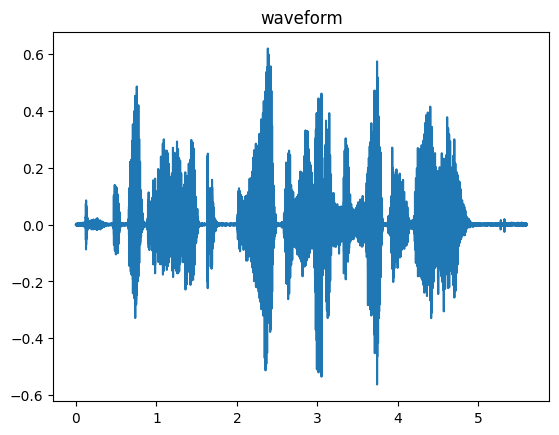

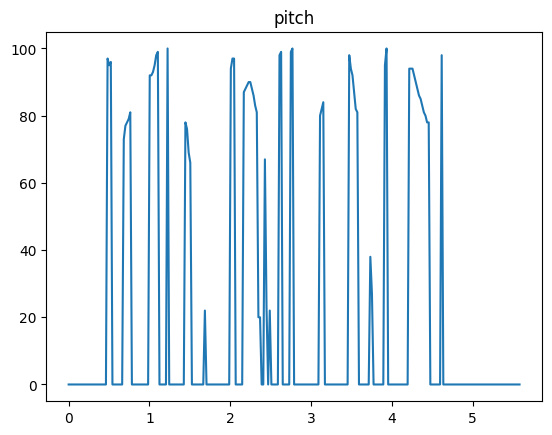

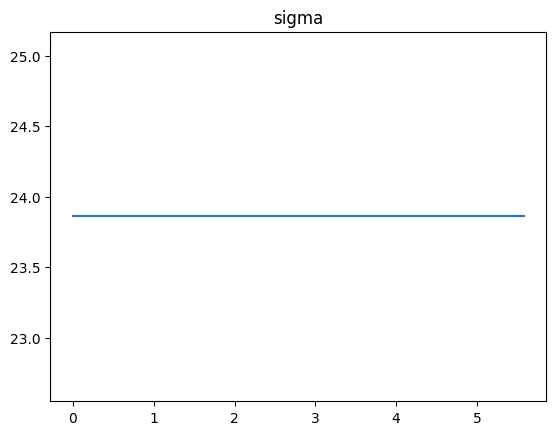

'\n# power spectral density\nfig, ax = plt.subplots()\nfig.suptitle("estimated & theoretical spectral density")\ny_min = min(log_dict["original_psd"].min(), log_dict["synthesis_psd"].min())\ny_max = max(log_dict["original_psd"].max(), log_dict["synthesis_psd"].max())\n\ndef animate(i):\n    ax.cla()\n    ax.set_ylim([y_min-0.1, y_max+0.1])\n    ax.plot(log_dict["original_psd"][i], label="original_psd")\n    ax.plot(log_dict["synthesis_psd"][i], label="synthesis_psd")\nanimation = matplotlib.animation.FuncAnimation(fig, animate, frames=len(log_dict["original_psd"]))\ndisplay(HTML(animation.to_jshtml()))\nplt.close()\n'

In [12]:
## plot

# time axis for plotting
sample_time = np.linspace(0, len(x)/sampling_rate, len(x))
frame_time = np.linspace(0, n_frame*frame_duration*(1-overlap_ratio), n_frame)

# waveform
plt.title("waveform")
plt.plot(sample_time, x)
plt.show()

# pitch
plt.title("pitch")
plt.plot(frame_time, log_dict["pitch"])
plt.show()

# variance
plt.title("sigma")
plt.plot(frame_time, log_dict["sigma"])
plt.show()
'''
# power spectral density
fig, ax = plt.subplots()
fig.suptitle("estimated & theoretical spectral density")
y_min = min(log_dict["original_psd"].min(), log_dict["synthesis_psd"].min())
y_max = max(log_dict["original_psd"].max(), log_dict["synthesis_psd"].max())

def animate(i):
    ax.cla()
    ax.set_ylim([y_min-0.1, y_max+0.1])
    ax.plot(log_dict["original_psd"][i], label="original_psd")
    ax.plot(log_dict["synthesis_psd"][i], label="synthesis_psd")
animation = matplotlib.animation.FuncAnimation(fig, animate, frames=len(log_dict["original_psd"]))
display(HTML(animation.to_jshtml()))
plt.close()
'''